In [99]:
##The code could be run line by line.  

In [100]:
## Install pycaret in git:
# conda create --name pycaret python=3.8
# conda activate pycaret
# pip install pycaret

In [101]:
### Construct a function to add null when a feature does not exist.
def Df_list(Df,List):
    Rwonames = Df.index
    Colnames = Df.columns
    #Df_out=Df
    Df_out=pd.DataFrame()
    for i in List:
        if i in Colnames:
            Df_out[i]= Df[i]
        else:
            Df_out[i]= len(Rwonames)*0.0
    print ("Df_out",Df_out)
    return (Df_out)

In [102]:
import pandas as pd
import scipy.stats as st
from pycaret.classification import *
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter

ProjectTitle = "Metagenomes"
fileDir = "result" 

import os
path =  "H:\\ysc\\19YGC\\test\\XGB-IBD10"      
FigureDir = path+"\\"+fileDir
if not os.path.exists(FigureDir):
    os.makedirs(FigureDir) # create path
os.chdir(FigureDir)

### Top 10 variabel feature among 9 cohorts
ListItem = ["diagnosis","Dorea_formicigenerans", "Fusicatenibacter_saccharivorans", "Anaerotruncus_rubiinfantis", "Oscilibacter_massiliensis", "Akkermansia_muciniphila", "Alistipes_finegoldii", "Ruminococcus_bromii", "Collinsella_aerofaciens", "Clostridioides_difficile", "Eubacterium_oxidoreducens"]
ListItem


['diagnosis',
 'Dorea_formicigenerans',
 'Fusicatenibacter_saccharivorans',
 'Anaerotruncus_rubiinfantis',
 'Oscilibacter_massiliensis',
 'Akkermansia_muciniphila',
 'Alistipes_finegoldii',
 'Ruminococcus_bromii',
 'Collinsella_aerofaciens',
 'Clostridioides_difficile',
 'Eubacterium_oxidoreducens']

In [103]:
InputRawdir = "~H:\\ysc\\19YGC\\test\\XGB-IBD10\\data\\"

In [104]:
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_ihmp.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1)
data_22 = Df_list(data_22,ListItem)
data_22.to_csv("susetdata_HMP_novo4.csv",sep="\t")


Df_out       diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0             2               0.000000                         0.764414   
1             2               0.000000                         0.860581   
2             2               0.000000                         0.000000   
3             2               0.000000                         0.144608   
4             2               0.000000                         0.000000   
...         ...                    ...                              ...   
1633          2               0.142806                         1.127112   
1634          2               0.157367                         0.462586   
1635          2               0.002090                         0.108063   
1636          2               0.076969                         1.673443   
1637          2               0.000000                         0.000000   

      Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                            

In [105]:
Counter(data_22['diagnosis'])

Counter({2: 1209, 1: 429})

In [106]:
df1=data_22.sample(frac=0.70, random_state=100)  
df2=data_22[~data_22.index.isin(df1.index)]     
df_1_2 = pd.concat([df1,df2])                   
df1.to_csv("susetdata_HMP_novo4_used.csv",sep="\t")
df2.to_csv("susetdata_HMP_novo4_unused.csv",sep="\t")
df2

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
0,2,0.000000,0.764414,0,0,0.000000,0.000000,0.0,0.000000,0.0,0
1,2,0.000000,0.860581,0,0,0.000000,0.000000,0.0,0.000000,0.0,0
2,2,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.000000,0.0,0
5,2,0.000000,0.000000,0,0,0.038057,0.000000,0.0,0.025851,0.0,0
6,2,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.253082,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1606,2,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.000000,0.0,0
1612,2,0.125916,2.127389,0,0,0.000000,0.388807,0.0,0.260881,0.0,0
1620,2,0.099430,0.374989,0,0,0.000000,1.056306,0.0,0.000000,0.0,0
1621,2,0.027664,1.092478,0,0,0.000000,0.551698,0.0,0.000000,0.0,0


In [107]:
ProjectTitle = "Microbial"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_NIHMS1510763.csv",sep="\t") 
data_22 = data.drop(["Project"],axis=1)
data_22 = Df_list(data_22,ListItem)
data_22_NIHM = data_22

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            2               0.002704                                0   
1            2               0.006288                                0   
2            2               0.000000                                0   
3            2               0.001651                                0   
4            2               0.000000                                0   
..         ...                    ...                              ...   
215          2               0.000000                                0   
216          2               0.026301                                0   
217          2               0.046922                                0   
218          2               0.015211                                0   
219          2               0.028694                                0   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                             0           

In [108]:
Counter(data_22['diagnosis'])

Counter({2: 164, 1: 56})

In [109]:
df3=data_22.sample(frac=0.70, random_state=100)  
df4=data_22[~data_22.index.isin(df3.index)]     
df_3_4 = pd.concat([df3,df4])                   
df3.to_csv("susetdata_NIHM_novo4_used.csv",sep="\t")
df4.to_csv("susetdata_NIHM_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_NIHM_novo4.csv",sep="\t")


In [110]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_mgx191_remove10.csv",sep="\t") ##分两类 0-4+12-14； 6-10
data_22 = data.drop(['Project'],axis=1) #删除第二行符号
data_22 = Df_list(data_22,ListItem)

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            2               0.000000                         2.053640   
1            1               1.651945                         3.242420   
2            2               1.184560                         0.000000   
3            1               0.000000                         0.000000   
4            2               0.000000                         0.000000   
..         ...                    ...                              ...   
176          1               0.000000                         2.502157   
177          2               0.000000                         0.000000   
178          1               0.829768                         3.193776   
179          2               0.000000                         0.000000   
180          2               0.424041                         0.336398   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                           0.0           

In [111]:
Counter(data_22['diagnosis'])

Counter({2: 107, 1: 74})

In [112]:
df13=data_22.sample(frac=0.70, random_state=100)  
df14=data_22[~data_22.index.isin(df13.index)]     
df_13_14 = pd.concat([df13,df14])                  
df13.to_csv("susetdata_humann_mgx191_abundance_used.csv",sep="\t")
df14.to_csv("susetdata_humann_mgx191_abundance_unused.csv",sep="\t")
data_22.to_csv("susetdata_humann_mgx191_abundance_novo4.csv",sep="\t")

In [113]:
df13

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
89,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3.655046,0.000000,0.789779,0.0
146,2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.717412,0.0
11,1,0.152858,0.770313,0.0,0.0,0.121586,0.980757,1.385221,0.933082,0.000000,0.0
75,2,0.000000,2.844576,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
139,1,1.049847,1.201138,0.0,0.0,0.000000,0.758167,3.401864,1.990911,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
150,2,0.737903,0.000000,0.0,0.0,0.233864,1.069998,0.000000,1.354503,0.000000,0.0
104,2,0.000000,0.000000,0.0,0.0,0.000000,0.444052,0.000000,3.550162,0.000000,0.0
50,2,0.258193,1.775923,0.0,0.0,0.000000,0.068024,2.443079,0.000000,0.000000,0.0
68,2,0.040387,0.716886,0.0,0.0,0.000000,0.052360,0.000000,0.446256,0.000000,0.0


In [114]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_SRP165757.csv",sep="\t")
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_SRP165757 = data_22

Df_out       diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0             2               0.000000                         0.000000   
1             2               0.000000                         0.000000   
2             2               3.459432                         1.584963   
3             2               1.000000                         1.000000   
4             2               0.000000                         0.000000   
...         ...                    ...                              ...   
1202          2               0.000000                         1.584963   
1203          2               2.000000                         0.000000   
1204          2               0.000000                         0.000000   
1205          2               0.000000                         2.321928   
1206          2               0.000000                         1.584963   

      Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                       0.000

In [115]:
df21=data_22.sample(frac=0.70, random_state=100)  
df22=data_22[~data_22.index.isin(df21.index)]    
df_21_22 = pd.concat([df21,df22])                 
df21.to_csv("susetdata_Multimerge_SRP165757_novo4_used.csv",sep="\t")
df22.to_csv("susetdata_Multimerge_SRP165757_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_SRP165757_novo4.csv",sep="\t")

In [116]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_SRP125127.csv",sep="\t") ##分两类 0-4+12-14； 6-10
data_22 = data.drop(['Project'],axis=1) #删除第二行符号
data_22 = Df_list(data_22,ListItem)
data_22_SRP125127 = data_22

Df_out       diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0             2                0.00000                              0.0   
1             2                0.00000                              0.0   
2             2                3.70044                              0.0   
3             2                0.00000                              0.0   
4             2                0.00000                              0.0   
...         ...                    ...                              ...   
1532          2                0.00000                              0.0   
1533          2                0.00000                              0.0   
1534          2                0.00000                              0.0   
1535          2                0.00000                              0.0   
1536          2                0.00000                              0.0   

      Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                            

In [117]:
df23=data_22.sample(frac=0.70, random_state=100)  ##抽取行， axis=1时可提取列   0.5
df24=data_22[~data_22.index.isin(df23.index)]     ##提取剩下的行
df_23_24 = pd.concat([df23,df24])                   ###合并行
df23.to_csv("susetdata_Multimerge_SRP125127_novo4_used.csv",sep="\t")
df24.to_csv("susetdata_Multimerge_SRP125127_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_SRP125127_novo4.csv",sep="\t")
df23

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
101,2,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.754888,0.000000,0.0
842,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6.285402,0.000000,0.0
1342,2,0.0,0.0,0.0,0.0,7.098032,0.0,1.0,0.000000,0.000000,0.0
511,2,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,8.092757,0.000000,0.0
508,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
26,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1123,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0
236,2,2.0,0.0,0.0,0.0,1.584963,0.0,0.0,6.442943,0.000000,0.0
15,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,7.357552,0.0


In [118]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_SRP076281.csv",sep="\t")
data_22 = data.drop(['Project'],axis=1)
data_22 = Df_list(data_22,ListItem)
data_22_SRP076281 = data_22

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            2                      0                                0   
1            2                      0                                0   
2            2                      0                                0   
3            2                      0                                0   
4            2                      0                                0   
..         ...                    ...                              ...   
153          2                      0                                0   
154          2                      0                                0   
155          2                      0                                0   
156          2                      0                                0   
157          2                      0                                0   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                             0           

In [119]:
df25=data_22.sample(frac=0.70, random_state=100)  
df26=data_22[~data_22.index.isin(df25.index)]  
df_25_26 = pd.concat([df25,df26])             
df25.to_csv("susetdata_Multimerge_SRP076281_novo4_used.csv",sep="\t")
df26.to_csv("susetdata_Multimerge_SRP076281_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_SRP076281_novo4.csv",sep="\t")
df25

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
45,2,0,0,0,0,0,0,0,0,0,0
11,2,0,0,0,0,0,0,0,0,0,0
124,2,0,0,0,0,0,0,0,0,0,0
15,2,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
38,2,0,0,0,0,0,0,0,0,0,0
39,2,0,0,0,0,0,0,0,0,0,0
127,2,0,0,0,0,0,0,0,0,0,0
48,2,0,0,0,0,0,0,0,0,0,0


In [120]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_SRP062005.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_SRP062005 = data_22
df27=data_22.sample(frac=0.70, random_state=100)  
df28=data_22[~data_22.index.isin(df27.index)]    
df_27_28 = pd.concat([df27,df28])           
df27.to_csv("susetdata_Multimerge_SRP062005_novo4_used.csv",sep="\t")
df28.to_csv("susetdata_Multimerge_SRP062005_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_SRP062005_novo4.csv",sep="\t")
df27

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            1               2.321928                         0.000000   
1            1               1.000000                         0.000000   
2            1               1.584963                         1.584963   
3            1               2.000000                         0.000000   
4            1               1.000000                         0.000000   
..         ...                    ...                              ...   
425          1               1.000000                         0.000000   
426          1               1.000000                         0.000000   
427          1               0.000000                         0.000000   
428          1               2.000000                         0.000000   
429          1               2.000000                         0.000000   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                      0.000000           

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
84,1,1.584963,0.000000,0.000000,0,4.523562,0.000000,2.807355,8.405141,0.000000,0.0
133,1,0.000000,0.000000,0.000000,0,1.000000,0.000000,0.000000,0.000000,1.584963,0.0
305,1,2.584963,2.321928,1.584963,0,5.523562,2.000000,1.000000,0.000000,0.000000,0.0
23,1,2.807355,2.000000,0.000000,0,6.672425,2.321928,0.000000,3.584963,0.000000,0.0
278,1,2.321928,1.000000,2.321928,0,1.000000,3.169925,4.087463,6.672425,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
223,1,2.807355,1.000000,1.000000,0,7.924813,1.000000,6.000000,7.900867,0.000000,0.0
220,1,0.000000,1.000000,0.000000,0,4.906891,0.000000,0.000000,3.584963,1.000000,0.0
67,1,0.000000,0.000000,0.000000,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
109,1,3.321928,0.000000,0.000000,0,0.000000,0.000000,2.807355,4.954196,1.000000,0.0


In [121]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_SRP057027.csv",sep="\t") ##分两类 0-4+12-14； 6-10
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_SRP057027 = data_22
df29=data_22.sample(frac=0.70, random_state=100)  
df30=data_22[~data_22.index.isin(df29.index)]     
df_29_30 = pd.concat([df29,df30])     
df29.to_csv("susetdata_Multimerge_SRP057027_novo4_used.csv",sep="\t")
df30.to_csv("susetdata_Multimerge_SRP057027_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_SRP057027_novo4.csv",sep="\t")
df29

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            2               1.584963                              0.0   
1            2               0.000000                              0.0   
2            2               0.000000                              0.0   
3            2               0.000000                              0.0   
4            2               0.000000                              0.0   
..         ...                    ...                              ...   
357          2               0.000000                              0.0   
358          2               0.000000                              0.0   
359          2               0.000000                              0.0   
360          2               0.000000                              0.0   
361          2               0.000000                              0.0   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                           0.0           

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
75,1,0.0,0.0,0.0,0.000000,2.321928,1.0,0.0,0.000000,0.0,0
291,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,0
276,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
282,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
310,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.584963,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
140,2,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,1.584963,0.0,0
158,2,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
200,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0
217,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0


In [122]:
Counter(df_29_30['diagnosis'])

Counter({1: 26, 2: 336})

In [123]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_ERP024243.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_ERP024243 = data_22
df31=data_22.sample(frac=0.70, random_state=100)  
df32=data_22[~data_22.index.isin(df31.index)]    
df_31_32 = pd.concat([df31,df32])             
df31.to_csv("susetdata_Multimerge_ERP024243_novo4_used.csv",sep="\t")
df32.to_csv("susetdata_Multimerge_ERP024243_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_ERP024243_novo4.csv",sep="\t")
df31

Df_out     diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0           2                      0                                0   
1           2                      0                                0   
2           2                      0                                0   
3           2                      0                                0   
4           2                      0                                0   
5           2                      0                                0   
6           2                      0                                0   
7           2                      0                                0   
8           2                      0                                0   
9           2                      0                                0   
10          2                      0                                0   
11          2                      0                                0   
12          2                      0        

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
19,2,0,0,0,0,0,0,0,0,0,0
6,2,0,0,0,0,0,0,0,0,0,0
20,2,0,0,0,0,0,0,0,0,0,0
0,2,0,0,0,0,0,0,0,0,0,0
34,2,0,0,0,0,0,0,0,0,0,0
25,2,0,0,0,0,0,0,0,0,0,0
39,2,0,0,0,0,0,0,0,0,0,0
21,2,0,0,0,0,0,0,0,0,0,0
28,2,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,0


In [124]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_ERP022127.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_ERP022127 = data_22
df33=data_22.sample(frac=0.70, random_state=100) 
df34=data_22[~data_22.index.isin(df33.index)] 
df_33_34 = pd.concat([df33,df34])  
df33.to_csv("susetdata_Multimerge_ERP022127_novo4_used.csv",sep="\t")
df34.to_csv("susetdata_Multimerge_ERP022127_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_ERP022127_novo4.csv",sep="\t")
df33

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            1                      0                                0   
1            1                      0                                0   
2            1                      0                                0   
3            1                      0                                0   
4            1                      0                                0   
..         ...                    ...                              ...   
821          1                      0                                0   
822          1                      0                                0   
823          1                      0                                0   
824          1                      0                                0   
825          1                      0                                0   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                             0           

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
552,1,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0
703,1,0,0,0,0,0.000000,0.0,1.0,9.670656,0.0,0
581,1,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0
19,1,0,0,0,0,0.000000,0.0,0.0,9.379378,0.0,0
600,1,0,0,0,0,1.000000,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
779,1,0,0,0,0,0.000000,0.0,0.0,8.810572,0.0,0
8,1,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0
504,1,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0
571,1,0,0,0,0,0.000000,0.0,0.0,10.378295,0.0,0


In [125]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_ERP021896.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_ERP021896 = data_22
df35=data_22.sample(frac=0.70, random_state=100)
df36=data_22[~data_22.index.isin(df35.index)]   
df_35_36 = pd.concat([df35,df36]) 
df35.to_csv("susetdata_Multimerge_ERP021896_novo4_used.csv",sep="\t")
df36.to_csv("susetdata_Multimerge_ERP021896_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_ERP021896_novo4.csv",sep="\t")
df35

Df_out       diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0             2               3.321928                                0   
1             2               1.584963                                0   
2             2               2.807355                                0   
3             2               4.700440                                0   
4             2               5.321928                                0   
...         ...                    ...                              ...   
1960          2               0.000000                                0   
1961          2               0.000000                                0   
1962          2               0.000000                                0   
1963          2               0.000000                                0   
1964          2               0.000000                                0   

      Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                            

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
110,2,1.584963,1,0.0,0.0,0.0,0,0.0,0.0,0,0
1007,2,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,0,0
1302,2,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,0,0
965,2,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,0,0
124,2,4.321928,0,0.0,2.0,0.0,0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
894,2,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,0,0
1765,2,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,0,0
112,2,2.321928,0,1.0,0.0,0.0,0,1.0,1.0,0,0
518,2,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,0,0


In [126]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_ERP016515.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_ERP016515 = data_22
df37=data_22.sample(frac=0.70, random_state=100)
df38=data_22[~data_22.index.isin(df37.index)] 
df_37_38 = pd.concat([df37,df38]) 
df37.to_csv("susetdata_Multimerge_ERP016515_novo4_used.csv",sep="\t")
df38.to_csv("susetdata_Multimerge_ERP016515_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_ERP016515_novo4.csv",sep="\t")
df37

Df_out       diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0             1               1.584963                         1.584963   
1             1               5.087463                         1.000000   
2             1               1.584963                         1.584963   
3             1               5.672425                         2.000000   
4             1               1.000000                         2.000000   
...         ...                    ...                              ...   
1552          1               1.584963                         1.584963   
1553          1               2.321928                         0.000000   
1554          1               2.000000                         0.000000   
1555          1               2.000000                         1.000000   
1556          1               3.000000                         0.000000   

      Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                       0.000

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
972,1,3.584963,0.000000,1.000000,1.000000,5.044394,0.000000,1.584963,8.303781,0.0,0
1007,1,1.000000,1.000000,0.000000,1.000000,0.000000,3.807355,0.000000,1.000000,0.0,0
356,1,5.781360,2.807355,0.000000,3.459432,3.906891,0.000000,1.000000,9.509775,0.0,0
713,1,2.000000,2.321928,0.000000,0.000000,0.000000,0.000000,1.000000,10.549785,0.0,0
1151,1,4.247928,2.000000,0.000000,0.000000,0.000000,2.807355,0.000000,11.901998,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,1,1.584963,1.584963,2.321928,0.000000,2.584963,0.000000,1.584963,9.036174,0.0,0
1245,1,6.906891,1.584963,1.584963,1.000000,4.700440,1.584963,0.000000,11.937006,1.0,0
894,1,3.700440,4.158709,0.000000,1.000000,0.000000,5.087463,0.000000,3.459432,0.0,0
1408,1,4.954196,0.000000,0.000000,0.000000,1.584963,0.000000,4.087463,8.960002,0.0,0


In [127]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_ERP015692.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_ERP015692 = data_22
df39=data_22.sample(frac=0.70, random_state=100)  
df40=data_22[~data_22.index.isin(df39.index)]     
df_39_40 = pd.concat([df39,df40])                 
df39.to_csv("susetdata_Multimerge_ERP015692_novo4_used.csv",sep="\t")
df40.to_csv("susetdata_Multimerge_ERP015692_novo4_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_ERP015692_novo4.csv",sep="\t")
df39

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            2                      0                                0   
1            2                      0                                0   
2            2                      0                                0   
3            2                      0                                0   
4            2                      0                                0   
..         ...                    ...                              ...   
106          1                      0                                0   
107          1                      0                                0   
108          1                      0                                0   
109          1                      0                                0   
110          1                      0                                0   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                             0           

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
25,2,0,0,0,0,0,0,0,0,0,0
51,2,0,0,0,0,0,0,0,0,0,0
21,2,0,0,0,0,0,0,0,0,0,0
26,2,0,0,0,0,0,0,0,0,0,0
64,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
55,2,0,0,0,0,0,0,0,0,0,0
97,1,0,0,0,0,0,0,0,0,0,0
61,2,0,0,0,0,0,0,0,0,0,0
65,2,0,0,0,0,0,0,0,0,0,0


In [128]:
Counter(df_39_40['diagnosis'])

Counter({2: 96, 1: 15})

In [129]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_He2017.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
data_22 = Df_list(data_22,ListItem)
data_22_He2017 = data_22
df43=data_22.sample(frac=0.70, random_state=100)  
df44=data_22[~data_22.index.isin(df43.index)]   
df_43_44 = pd.concat([df43,df44])          
df43.to_csv("susetdata_Multimerge_He2017_used.csv",sep="\t")
df44.to_csv("susetdata_Multimerge_He2017_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_He2017.csv",sep="\t")
df43

Df_out      diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0            2               0.000640                                0   
1            2               0.000056                                0   
2            2               0.000000                                0   
3            2               0.000798                                0   
4            2               0.000000                                0   
..         ...                    ...                              ...   
112          1               0.000021                                0   
113          1               0.000401                                0   
114          1               0.000263                                0   
115          1               0.000167                                0   
116          1               0.000074                                0   

     Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
0                             0           

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
104,1,0.001317,0,0,0,0.0,0.000068,0.007844,0.000245,0,0
107,1,0.000616,0,0,0,0.0,0.000000,0.000000,0.001819,0,0
37,2,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0,0
45,2,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0,0
96,1,0.000169,0,0,0,0.0,0.000746,0.007480,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
102,1,0.000085,0,0,0,0.0,0.000027,0.002204,0.000000,0,0
61,2,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0,0
65,1,0.000000,0,0,0,0.0,0.000000,0.007936,0.005754,0,0
47,2,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0,0


In [130]:
Counter(df_43_44['diagnosis'])

Counter({1: 54, 2: 63})

In [131]:
ProjectTitle = "Metagenomes"
data = pd.read_csv(InputRawdir+"Pro3_metagenomes_Liguori2016.csv",sep="\t") 
data_22 = data.drop(['Project'],axis=1) 
#data_22= data_22[ListItem]
data_22 = Df_list(data_22,ListItem)
data_22_He2017 = data_22
df45=data_22.sample(frac=0.70, random_state=100)  
df46=data_22[~data_22.index.isin(df45.index)]    
df_45_46 = pd.concat([df45,df46])              
df45.to_csv("susetdata_Multimerge_Liguori2016_used.csv",sep="\t")
df46.to_csv("susetdata_Multimerge_Liguori2016_unused.csv",sep="\t")
data_22.to_csv("susetdata_Multimerge_Liguori2016.csv",sep="\t")
df45

Df_out     diagnosis  Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
0           2               0.000000                                0   
1           2               0.001668                                0   
2           2               0.002947                                0   
3           2               0.000032                                0   
4           2               0.018423                                0   
5           2               0.000041                                0   
6           2               0.005872                                0   
7           2               0.000048                                0   
8           2               0.000126                                0   
9           2               0.000080                                0   
10          2               0.000024                                0   
11          2               0.000104                                0   
12          2               0.000024        

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
6,2,0.005872,0,0,0,0.000000,0,0.000499,0.002471,0,0
28,2,0.026378,0,0,0,0.000000,0,0.000000,0.000000,0,0
32,2,0.000161,0,0,0,0.000482,0,0.000000,0.000027,0,0
26,2,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0,0
41,1,0.016740,0,0,0,0.000000,0,0.000157,0.003210,0,0
47,1,0.018024,0,0,0,0.000040,0,0.000000,0.007457,0,0
5,2,0.000041,0,0,0,0.000000,0,0.000000,0.001422,0,0
40,1,0.011725,0,0,0,0.000000,0,0.000000,0.007266,0,0
18,2,0.005073,0,0,0,0.000000,0,0.000000,0.000177,0,0
31,2,0.000026,0,0,0,0.000000,0,0.000000,0.000000,0,0


In [132]:
## combine cohorts
data_22 = pd.concat([df1,df3,df21,df23,df29,df37,df39,df43,df45])#,df13

In [133]:
Counter(data_22['diagnosis'])

Counter({1: 1499, 2: 3260})

In [134]:
from imblearn.over_sampling import SMOTE
y_t1=data_22['diagnosis']
X_t1= data_22.drop(['diagnosis'],axis=1)
import pandas as pd
import numpy as np
X_t1 = X_t1.fillna(0)  ##NA to 0
X_resampled_smote, y_resampled_smote = SMOTE(random_state=156).fit_sample(X_t1, y_t1)
X_resampled_smote.insert(loc=0,column="diagnosis",value=y_resampled_smote)
data_22=X_resampled_smote
Counter(y_resampled_smote)

Counter({1: 3260, 2: 3260})

In [135]:
data_22.to_csv("0.All.trainsample.csv",sep="\t")

In [136]:
df_train_unused = pd.concat([data_22,df_13_14])
df_train_unused

,diagnosis,Dorea_formicigenerans,Fusicatenibacter_saccharivorans,Anaerotruncus_rubiinfantis,Oscilibacter_massiliensis,Akkermansia_muciniphila,Alistipes_finegoldii,Ruminococcus_bromii,Collinsella_aerofaciens,Clostridioides_difficile,Eubacterium_oxidoreducens
0,1,0.120352,0.095182,0.0,0.0,0.000000,0.000000,0.00000,0.208630,0.0,0.0
1,2,0.201533,0.000000,0.0,0.0,0.000000,0.000000,0.65206,0.000000,0.0,0.0
2,2,0.139758,1.169701,0.0,0.0,0.000000,0.153092,0.00000,0.000000,0.0,0.0
3,2,0.003473,0.000000,0.0,0.0,0.002234,0.000000,0.00000,0.000000,0.0,0.0
4,1,0.037256,0.301272,0.0,0.0,5.799599,1.388977,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
155,2,0.762510,2.205236,0.0,0.0,0.000000,1.695410,0.00000,3.185201,0.0,0.0
157,2,0.568032,1.246700,0.0,0.0,0.000000,0.006492,0.00000,2.309750,0.0,0.0
169,2,0.000000,0.801482,0.0,0.0,0.000000,0.000000,0.00000,3.263188,0.0,0.0
178,1,0.829768,3.193776,0.0,0.0,0.000000,0.641907,0.00000,0.000000,0.0,0.0


In [137]:
df_train_unused=df_train_unused.drop(['diagnosis'],axis=1)
df_train_unused_T = df_train_unused.transpose() 

In [138]:
df_train_unused_T.to_csv("0.All.df_train_unused.csv",header=False,index=False,sep="\t")

In [139]:
# # Estimator	Abbrev. String
# Logistic Regression	‘lr’
# K Nearest Neighbour	‘knn’
# Naives Bayes	‘nb’
# Decision Tree	‘dt’
# SVM (Linear)	‘svm’
# SVM (RBF)	‘rbfsvm’
# Gaussian Process	‘gpc’
# Multi Level Perceptron	‘mlp’
# Ridge Classifier	‘ridge’
# Random Forest	‘rf’
# Quadratic Discriminant Analysis	‘qda’
# AdaBoost	‘ada’
# Gradient Boosting Classifier	‘gbc’
# Linear Discriminant Analysis	‘lda’
# Extra Trees Classifier	‘et’
# Extreme Gradient Boosting	‘xgboost’
# Light Gradient Boosting	‘lightgbm’
# Cat Boost Classifier	‘catboost’

s22 = setup(data=data_22, target='diagnosis',normalize = True, normalize_method = "minmax" , session_id=156, silent=True)
s22


 
Setup Succesfully Completed!


,Description,Value
0,session_id,156
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(6520, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(      Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
 0                  0.014670                         0.017564   
 1                  0.024565                         0.000000   
 2                  0.017035                         0.215841   
 3                  0.000423                         0.000000   
 4                  0.004541                         0.055593   
 ...                     ...                              ...   
 6515               0.004068                         0.075884   
 6516               0.003993                         0.005282   
 6517               0.486007                         0.262683   
 6518               0.000033                         0.000000   
 6519               0.383442                         0.184527   
 
       Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
 0                            0.0                   0.000000   
 1                            0.0                   0.000000   
 2                        

In [140]:
estimator_ysc = "xgboost"  
model = create_model(estimator_ysc)

,Accuracy,AUC,Speci,Sensi,Recall,Prec.,F1,Kappa
0,0.8665,0.9306,0.8684,0.8646,0.8684,0.8646,0.8665,0.7330
1,0.8796,0.9447,0.8728,0.8865,0.8728,0.8844,0.8786,0.7593
2,0.8534,0.9296,0.8472,0.8596,0.8472,0.8584,0.8527,0.7068
3,0.8750,0.9496,0.8596,0.8904,0.8596,0.8869,0.8731,0.7500
4,0.8816,0.9446,0.8553,0.9079,0.8553,0.9028,0.8784,0.7632
5,0.8684,0.9399,0.8772,0.8596,0.8772,0.8621,0.8696,0.7368
6,0.8706,0.9284,0.8728,0.8684,0.8728,0.8690,0.8709,0.7412
7,0.8991,0.9443,0.8772,0.9211,0.8772,0.9174,0.8969,0.7982
8,0.8706,0.9427,0.8465,0.8947,0.8465,0.8894,0.8674,0.7412
9,0.8575,0.9358,0.8158,0.8991,0.8158,0.8900,0.8513,0.7149


Save to4:  H:\ysc\19YGC\test\XGB-IBD10\result\xgboost-summary-None.pdf
Save to4:  [9 8 5 4 6 7 1 2 3 0] 1957       Dorea_formicigenerans  Fusicatenibacter_saccharivorans  \
2888               0.315079                         0.000000   
5406               0.256913                         0.000000   
5875               0.367781                         0.310114   
4391               0.121889                         0.000000   
4033               0.000000                         0.000000   
...                     ...                              ...   
6511               0.000000                         0.000000   
4445               0.283018                         0.000000   
3861               0.121889                         0.184527   
1500               0.000000                         0.000000   
4486               0.704685                         0.518032   

      Anaerotruncus_rubiinfantis  Oscilibacter_massiliensis  \
2888                    0.000000                   0.000000

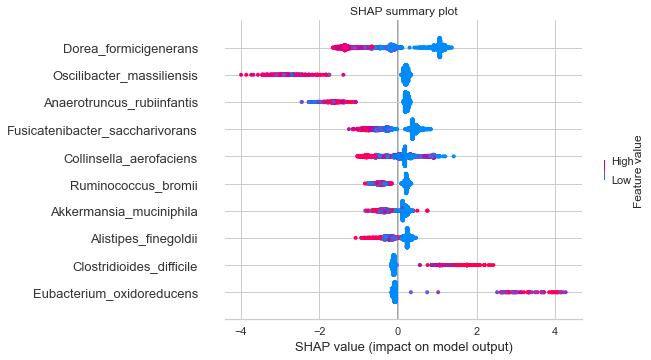

[[-1.0606102   0.53017974  0.2886043  ...  0.34208545 -0.12568195
  -0.10661542]
 [-0.6322866   0.40295225 -1.5424988  ... -0.08882801 -0.10049639
  -0.102656  ]
 [-1.2990844  -0.71964115 -1.8832576  ... -0.9418704  -0.16870344
  -0.13802117]
 ...
 [-0.07204495 -0.29042006 -1.5861998  ... -0.22570108 -0.07740004
  -0.10080242]
 [ 0.9142724   0.40098876  0.19571519 ...  0.13600689  1.7505602
  -0.06180875]
 [-1.5555712  -0.7479796   0.25614178 ...  0.08234578 -0.14607266
  -0.13389476]]
SHAP summary values5
['Dorea_formicigenerans', 'Fusicatenibacter_saccharivorans', 'Anaerotruncus_rubiinfantis', 'Oscilibacter_massiliensis', 'Akkermansia_muciniphila', 'Alistipes_finegoldii', 'Ruminococcus_bromii', 'Collinsella_aerofaciens', 'Clostridioides_difficile', 'Eubacterium_oxidoreducens'] [0.8558375  0.47928274 0.5003931  0.59565663 0.25235325 0.2488213
 0.28632367 0.36147773 0.23552625 0.20630014]
['Dorea_formicigenerans', 'Oscilibacter_massiliensis', 'Anaerotruncus_rubiinfantis', 'Fusicateniba

In [141]:
plot_model(model, plot = 'feature')
interpret_model(model)

[[ 45  29]
 [  6 101]]


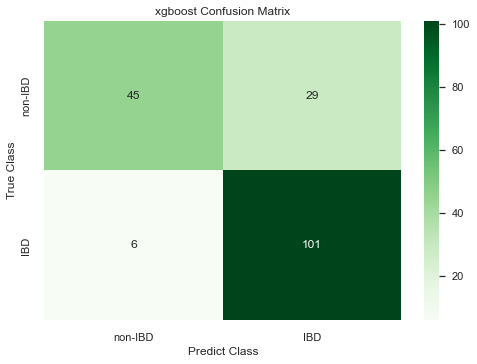

In [145]:
###test untrained samples
df_pred_test = df_13_14 
data_unseen = df_pred_test.drop(['diagnosis'],axis=1)
unseen_predictions = predict_model(model, data=data_unseen)
unseen_predictions.to_csv("susetdata_HMPmodel_humann_mgx_unseen_predictions-"+estimator_ysc+".csv",sep="\t")
#### Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
f,ax=plt.subplots()
y_true = df_pred_test[['diagnosis']] # y_true = [0,0,1,2,1,2,0,2,2,0,1,1]
y_pred = unseen_predictions[["Label"]] # y_pred = [1,0,1,2,1,0,0,2,2,0,1,1]
C2= confusion_matrix(y_true, y_pred, labels=[ 1, 2])    
print(C2) 
sns.heatmap(C2,annot=True,ax=ax,fmt="d",cmap="Greens", xticklabels=["non-IBD","IBD"], yticklabels=["non-IBD","IBD"]) 
ax.set_title(estimator_ysc+' Confusion Matrix')
ax.set_xlabel('Predict Class') #x
ax.set_ylabel('True Class') #y
fig = plt.gcf()# gcf: Get Current Figure #ysc
fig.savefig(path+"\\"+fileDir+"\\confusion-"+estimator_ysc+"-Modelmultimerge--humann_mgx-unusedpart.pdf") ###ysc